# SVR

In [1]:
from IPython.display import Image
from IPython.display import YouTubeVideo

In [ ]:
# Support Vector Machines (SVMs) are well known in classification problems.
# However, what if we are only concerned about reducing error to a certain degree? 
# What if we don’t care how large our errors are, as long as they fall within an acceptable range?

# Example :-
# Take housing prices for example. What if we are okay with the prediction being within a certain dollar amount
# — say $5,000? We can then give our model some flexibility in finding the predicted values, as long as the
# error is within that range.

# SVR is similar to Simple Linear Regression, except that it consists of of a tube (aka epsilon insensitive tube) around 
# the regression line within which, the error of the datapoints are not considered. 
# Only the points that lie outside the tube (aka Support Vectors) contribute to the error.
# The area in the tube is also known as Margin of Tolerance, since we're allowing some pre-defined
# amount of error in our model. The maximum no. of datapoints that fall inside the Margin of Tolerance, 
# that hyperplane (regression model) is selected.  SVR gives us the flexibility to define how much error is acceptable
# in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data.

### Article :
#### https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/

#### There are a few important parameters of SVM :

<b>Kernel:</b> The function used to map a lower dimensional data into a higher dimensional data. A kernel helps us find a hyperplane in the higher dimensional space without increasing the computational cost. Usually, the computational cost will increase if the dimension of the data increases. This increase in dimension is required when we are unable to find a separating hyperplane in a given dimension and are required to move in a higher dimension:

##### resources on kernels:
https://towardsdatascience.com/kernel-function-6f1d2be6091

https://www.youtube.com/watch?v=Z2_yh2sice8&t=9s

<b>Hyperplane:</b> This is basically a separating line between two data classes in SVM. But in Support Vector Regression, this is the line that will be used to predict the continuous output

<b>Decision Boundary:</b> A decision boundary can be thought of as a demarcation line (for simplification) on one side of which lie positive examples and on the other side lie the negative examples. It defines the margin of error of regression. On this very line, the examples may be classified as either positive or negative. This same concept of SVM will be applied in Support Vector Regression as well. The points outside of the Decision Boundary are known as Support Vectors.

<b>In contrast to OLS, the objective function of SVR is to minimize the coefficients — more specifically, the l2-norm of the coefficient vector — not the squared error. The error term is instead handled in the constraints, where we set the absolute error less than or equal to a specified margin, called the maximum error, ϵ (epsilon). We can tune epsilon to gain the desired accuracy of our model. Our objective function and constraints are as follows</b>

#### Minimize (Cost Function): $$minimize \rightarrow \frac{1}{2}\lvert \lvert w \rvert \rvert^2$$

#### Constraints (Model): $$\lvert y_i - \hat{y}_i \rvert \le \epsilon$$

$$\therefore \lvert y_i - (wx_i+b) \rvert \le \epsilon$$

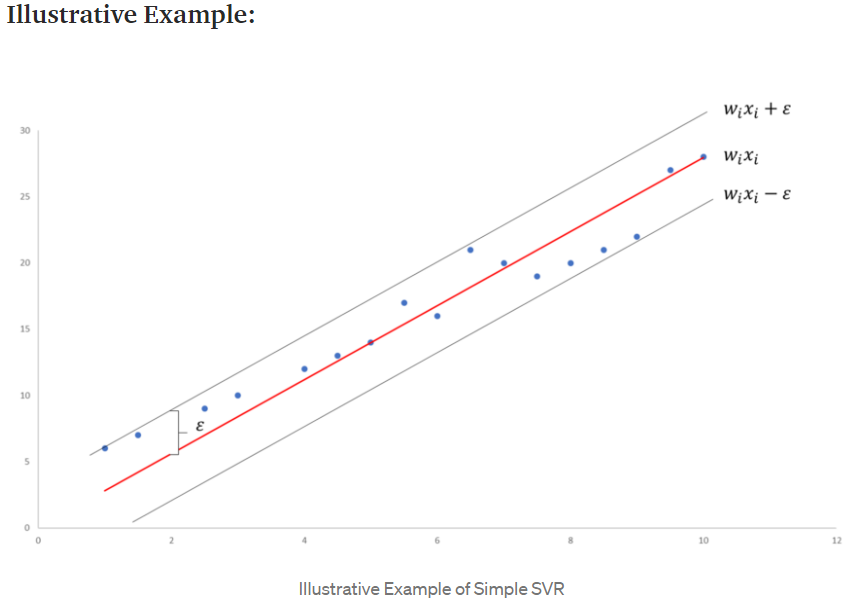

In [5]:
Image('CAPTURE.PNG',width=700, height=550, embed=True)

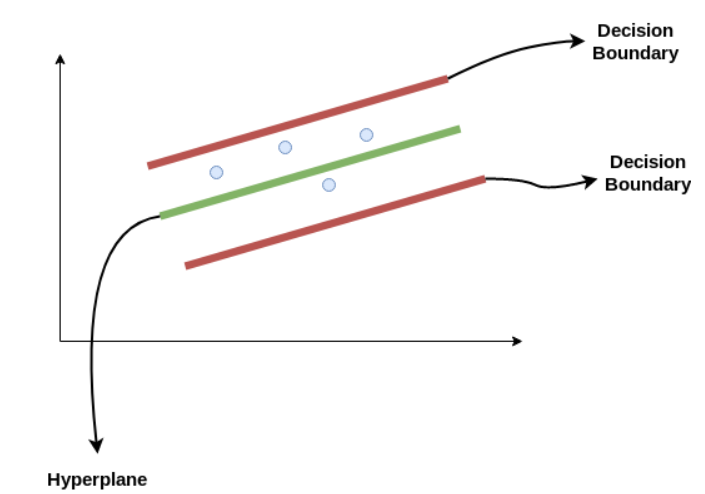

In [4]:
Image('CAPTURE1.PNG', width=700, height=550, embed=True)

#### Regression line  $$Y_i = wx_i + b$$

#### or hyperplane in case of higher dimensions $$Y_i = w_ix_i + b$$

#### Upper Decision Boundary: $$Y = wx + (b+\epsilon)$$

#### Lower Decision Boundary: $$Y = wx + (b-\epsilon)$$

In [6]:
# NOTE : In case of more than 1 feature, w will be a vector (indicating weights for each feature instead of a constant like
# in this case of SLR)

### Slack Variables
<b>For any value that falls outside $\epsilon$, we can denote its deviation from the margin as $\xi$</b>

<b>We know that these deviations have the potential to exist, but we would still like to minimize them as much as possible. Thus, we can add these deviations to the objective function.</b>

#### Minimize (Cost Function) : $$minimize \rightarrow\frac{1}{2}\lvert \lvert w \rvert \rvert^2 + C\sum_{i=1}^{n}\lvert \xi \rvert$$

#### Constraints (Model): $$\lvert y_i - \hat{y}_i \rvert \le \epsilon + \lvert \xi \rvert$$

$$\lvert y_i - (wx_i+b) \rvert \le \epsilon + \lvert \xi \rvert$$

This is a technique called "regularization". The very general idea is that if the weights are "small", then our estimates are closer to a common "baseline" estimate, and we aren't making wildly strong predictions and/or making wildly large changes in predictions for small changes in the input data.

This helps prevent overfitting, at the cost of "shrinking" our predictions towards a baseline and potentially reducing the sensitivity of the model to variation in the inputs. In the extreme case, an over-regularized model might predict the same output for every input.

By adding the total size of the weights into the objective function, we are telling our optimization process penalize bigger weights and prefer smaller weights. We control the strength of the penalty by adjusting C.

On the math side of things, this technique is an application of something called "Lagrange multipliers" that you will learn about in university-level calculus courses.

The technique of regularization by penalizing the "size" of the weights is quite general and you will see it appear in different types of machine learning models.

Edit: specifically in the context of an SVM, the optimization problem is not possible to solve without this weight penalization thing... there are other mathematical interpretations for what is happening here.

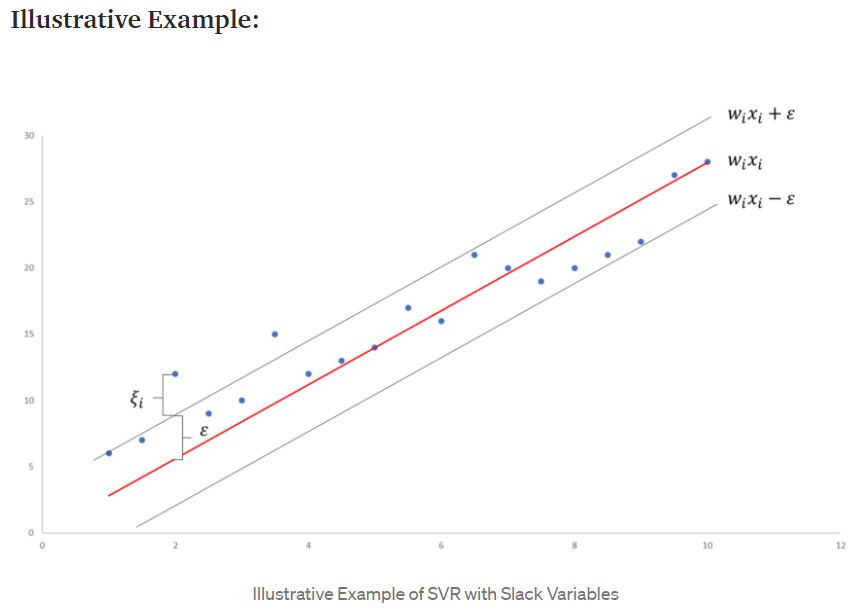

In [7]:
Image('CAPTURE2.PNG',width=700,height=550, embed=True)

<b>Now there is another hyperparameter to tune, C. As C increases, our tolerance for points outside of $\epsilon$ also increases</b>

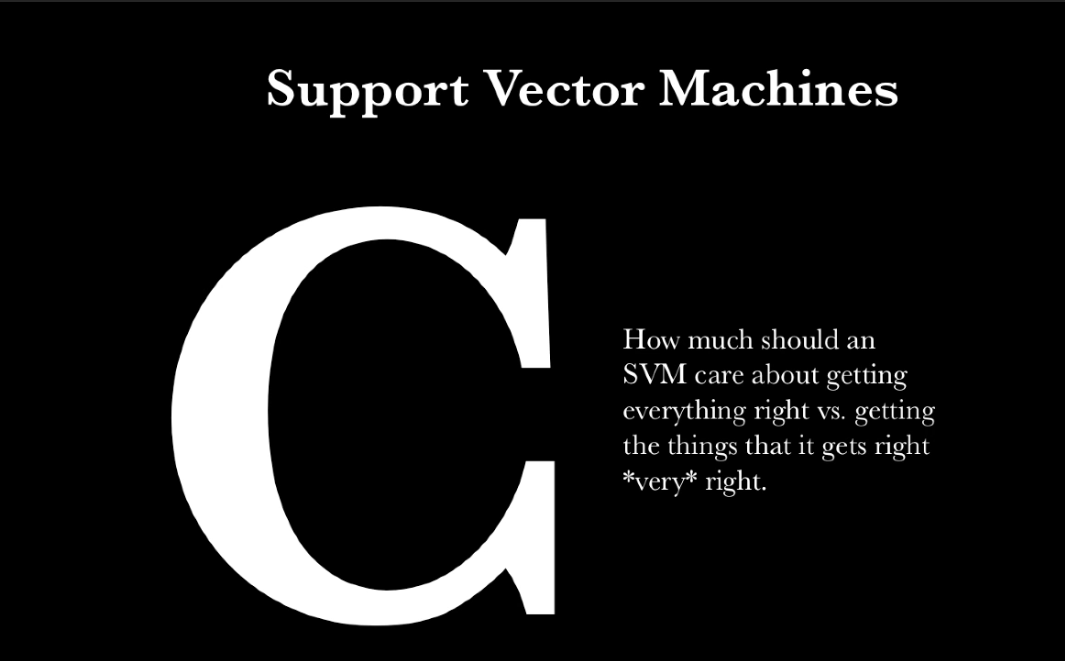

In [4]:
Image('CAPTURE4.PNG',width=700,height=700, embed=True) # C in regards of SVM

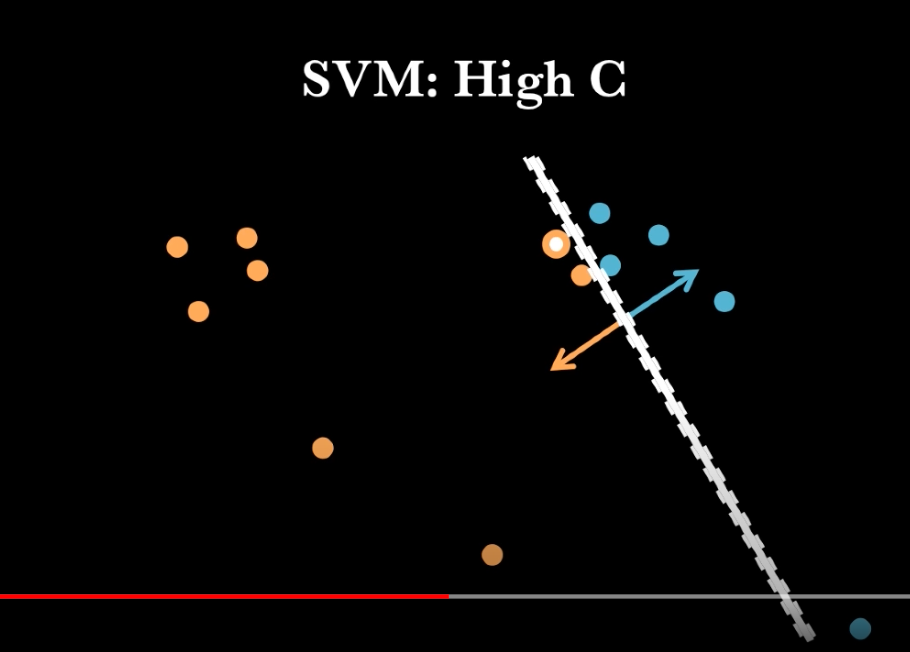

In [5]:
Image('CAPTURE5.PNG',width=700,height=700, embed=True)

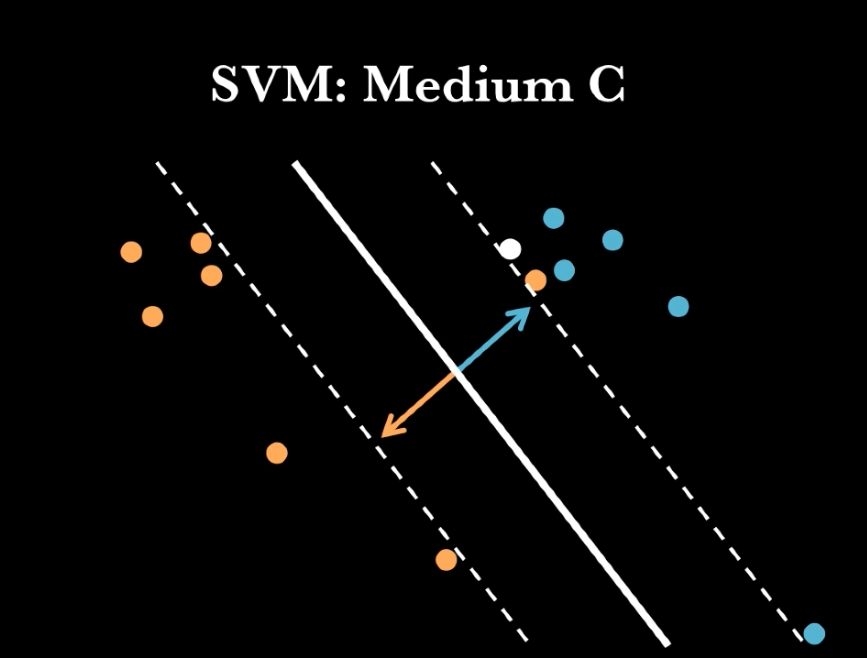

In [7]:
Image('CAPTURE6.PNG',width=700,height=700, embed=True)

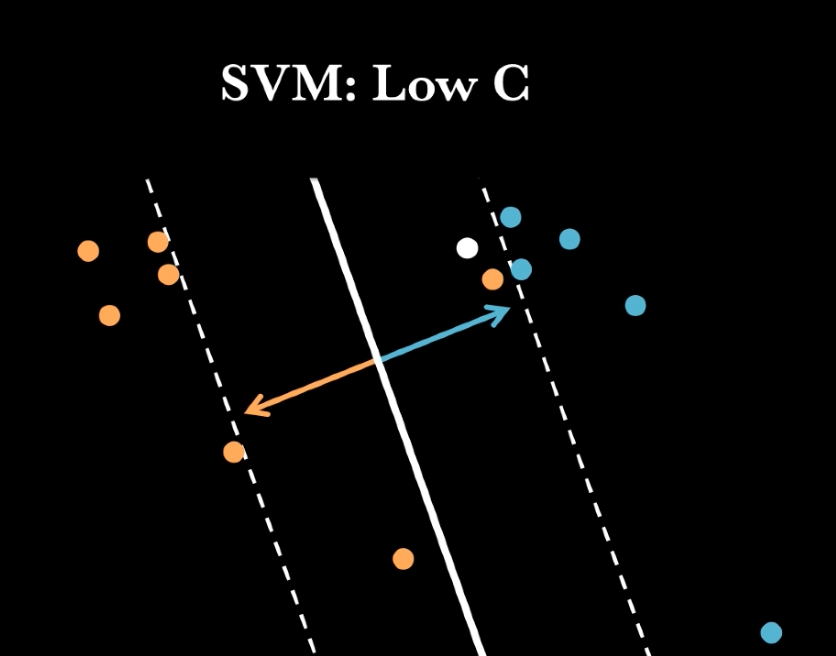

In [8]:
Image('CAPTURE7.PNG',width=700,height=700, embed=True)

## Finding the best value of C.

#### We can find the optimum C using grid search over C.  We can define a scoring metric, '% within $\epsilon$'. This metric measures how many of the total points within our test set fall within our margin of error. We can also monitor how the Mean Absolute Error (MAE) varies with C as well.

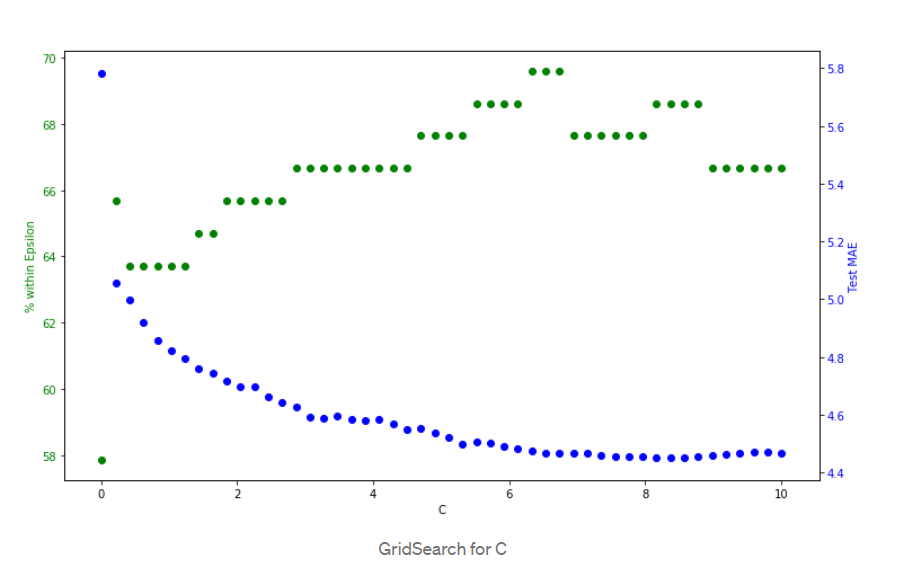

In [10]:
# Here is what an example could be of a plot of the grid search results.
Image('CAPTURE3.PNG',width=800, height=650, embed=True)

##### MAE generally decreases as C increases. However, we see a maximum occur in the % within Epsilon metric. Since our original objective of this model was to maximize the prediction within our margin of error, we want t find the value of C that maximizes % within $\epsilon$. Thus in this case, $C=6.13$

#### We will get the best model when the values of $\epsilon$ and $C$ are optimum.
##### SVR is a powerful algorithm that allows us to choose how tolerant we are of errors, both through an acceptable error margin($\epsilon$) and through tuning our tolerance of falling outside that acceptable error rate.

In [11]:
# NOTE : Non - Linear SVR is also very popular

### MY DOUBTS:

1) Why do we want to decrease the l2 norm of coffecient vector i.e : $$\frac{1}{2} \lvert \lvert w \rvert \rvert^2$$

2) Can't understand hyperparameter $C$. Also can't relate how the definition of $C$ relates to the mathematical equation :$$min( \frac{1}{2}\lvert \lvert w \rvert \rvert^2 + C \sum_{i=1}^{n}\lvert \xi \rvert )$$

# CODE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1:].values

In [9]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [10]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [11]:
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## SVR

#### SCALE DATA FOR SVR

In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
scaled_X = sc_X.fit_transform(X)
scaled_Y = sc_Y.fit_transform(Y)

In [29]:
scaled_X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [30]:
scaled_Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

#### TRAIN

In [72]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
svr_reg.fit(scaled_X, scaled_Y.reshape(10,))

SVR()

In [73]:
svr_reg.epsilon, svr_reg.C

(0.1, 1.0)

## Polynomial Linear Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Transform X to polynomial degree
poly_transformer = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_transformer.fit_transform(X)

# model training
poly_reg = LinearRegression()
poly_reg.fit(X_poly, Y)

LinearRegression()

In [19]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

#### PREDICTIONS

In [74]:
# SVR prediction
print(sc_Y.inverse_transform(svr_reg.predict(sc_X.transform([[6.5]]))))

svr_predictions = sc_Y.inverse_transform(svr_reg.predict(sc_X.transform(X)))

[170370.0204065]


In [62]:
# Polynomial Linear Regression prediction
print(poly_reg.predict(poly_transformer.transform([[6.5]])))

poly_predictions = poly_reg.predict(poly_transformer.transform(X))

[[158862.45265152]]


In [57]:
svr_predictions

array([522500., 522500., 522500., 522500., 522500., 522500., 522500.,
       522500., 522500., 522500.])

In [44]:
poly_predictions

array([[ 53356.64335659],
       [ 31759.90675987],
       [ 58642.19114216],
       [ 94632.86713284],
       [121724.94172493],
       [143275.05827505],
       [184003.49650351],
       [289994.1724942 ],
       [528694.63869469],
       [988916.08391616]])

#### VISUALIZE

In [24]:
%matplotlib notebook

<IPython.core.display.Javascript object>


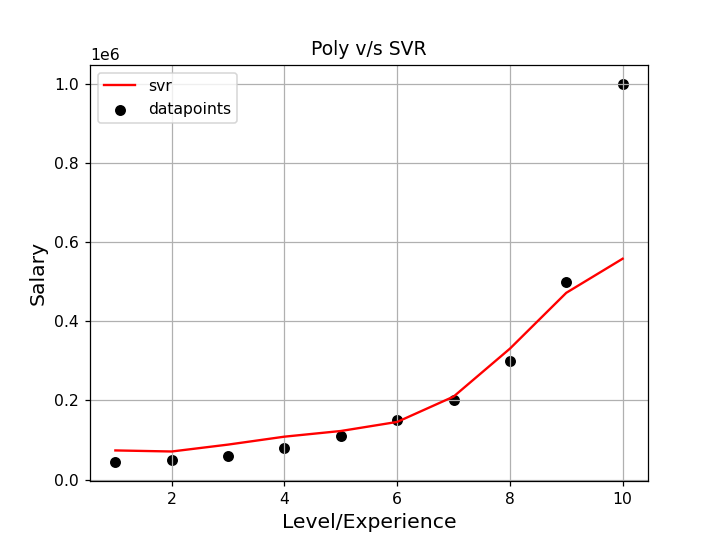

[]

In [77]:
plt.scatter(X,Y, c='black', label='datapoints')
# plt.plot(X, svr_predictions + svr_reg.epsilon, c='green', linestyle='dashed')
plt.plot(X, svr_predictions, c='red', label='svr')
# plt.plot(X, svr_predictions - svr_reg.epsilon, c='green', linestyle='dashed')
plt.title('Poly v/s SVR')
plt.xlabel('Level/Experience', fontsize=13)
plt.ylabel('Salary', fontsize=13)
plt.grid()
plt.legend()
plt.plot()

<IPython.core.display.Javascript object>


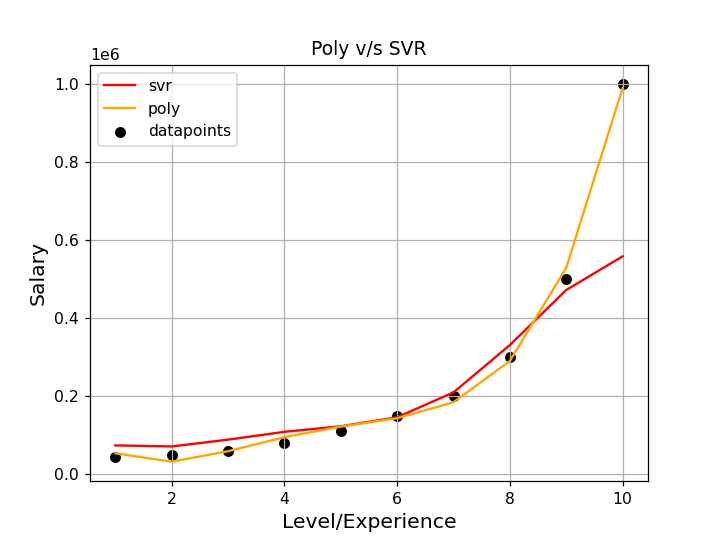

[]

In [78]:
plt.scatter(X,Y, c='black', label='datapoints')
plt.plot(X, svr_predictions, c='red', label='svr')
plt.plot(X, poly_predictions, c='orange', label='poly')
plt.title('Poly v/s SVR')
plt.xlabel('Level/Experience', fontsize=13)
plt.ylabel('Salary', fontsize=13)
plt.grid()
plt.legend()
plt.plot()

In [1]:
# SVR considers the last datapoint as an outlier ig....
# polynomial models tends to easily over-fit

###  METRICS

In [79]:
from sklearn.metrics import r2_score
svr_score = r2_score(Y, svr_predictions)
poly_score = r2_score(Y, poly_predictions)
print(svr_score, poly_score)

0.7516001070620797 0.9973922891706611
